In [183]:
import os.path as pth
dir = '/home/jovyan/work/'
document = []
document.append("")
pers_max = 76

for pers in range(1, pers_max + 1):
    name = dir + "/depos-word/" + str("{:02d}".format(pers)) + ".txt"
    if (pth.isfile(name)):
        file = open(name, "rt")
        data = file.read()
        document.append(data)

FAITH 153 26 % 18 30 %
RITES 438 74 % 42 70 %
SUM 591 60


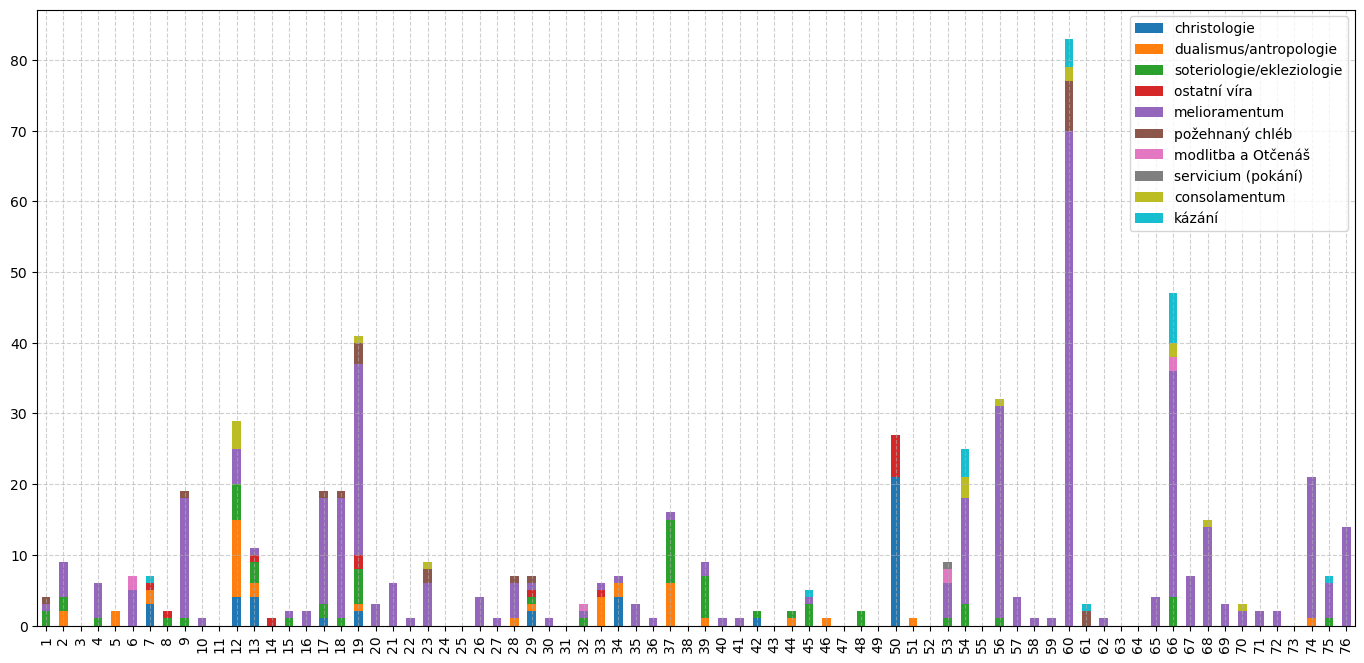

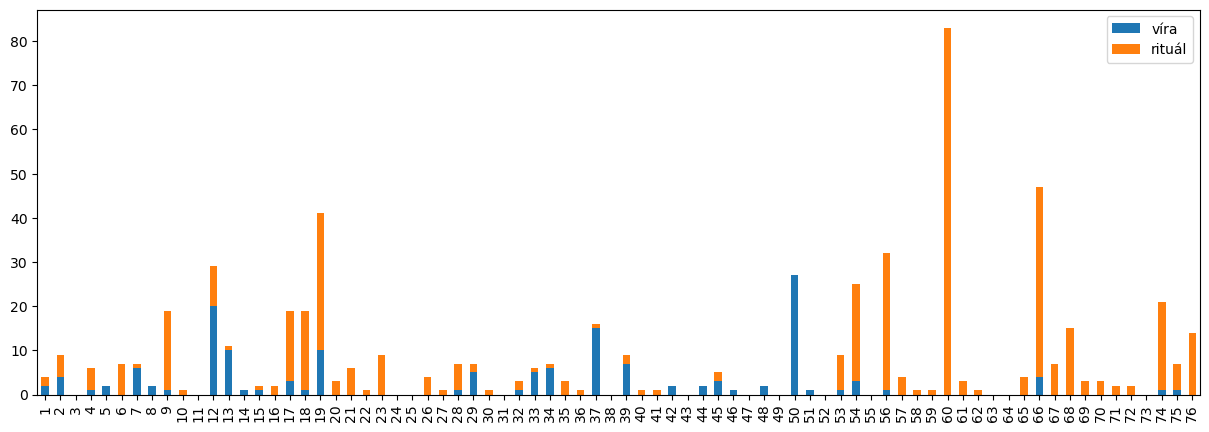

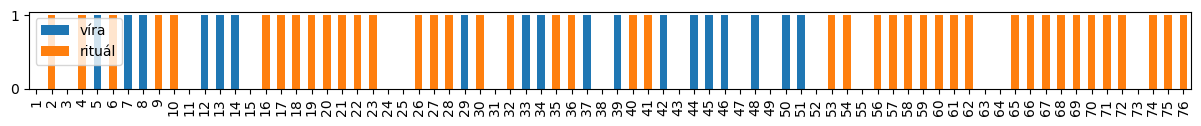

In [604]:
import re
import pandas as pd

class Pattern:
    def __init__(self, hitgroup, treshold, word, includes, excludes):
        self.word = word
        self.treshold = treshold        
        self.includes = includes
        self.excludes = excludes
        self.hitgroup = hitgroup
        
def find_matching_words_positions(text, search, included, excluded, surround):
    word_positions = [(match.group(), match.start(), match.end()) for match in re.finditer(r'\b\w+\b', text)]

    matching_word_positions = []
    word_pattern = re.compile(search, re.IGNORECASE)

    for word, start, end in word_positions:
        if word_pattern.search(word):
            start_pos = max(start - surround, 0)
            end_pos = min(end + surround, len(text))
            context = text[start_pos:end_pos]

            # Check if all 'included' regex patterns match and 'excluded' regex patterns do not match in the context
            if all(re.search(inc, context) for inc in included) and not any(re.search(exc, context) for exc in excluded):
                matching_word_positions.append((word, start, end))

    return matching_word_positions

def is_close_to_any(arr, target, distance):
    for num in arr:
        if abs(num - target) <= distance:
            return True
    return False

depos_max = 76
context = 170
index = []
hits = []
total_hits = []
positions = []
output = 16
distance = 50
surround = 70
rites = 0
faith = 0
one_rites = 0
one_faith = 0

total_hits.append([])
total_hits.append([])
total_hits.append([])
total_hits.append([])
for i in range(1, depos_max + 1):
    total_hits[0].append(0)
    total_hits[1].append(0)
    total_hits[2].append(0)
    total_hits[3].append(0)
    
for c in range(0, 11):
    hits.append([])
    positions.append([])
    for i in range(1, depos_max + 1):
        hits[c].append(0)
        positions[c].append([])

for i in range(1, depos_max + 1):
    index.append(i)                

patterns = [
    Pattern(0, 30,       'body',                            ['christ|god|lord'],                           ['give','gave','given','devil']),
    Pattern(0, surround, 'flesh',                           ['came', ' in'],                               []),
    Pattern(0, surround, 'virgin',                          ['blessed'],                                   ['spirit', ' st', 'saints', 'cry', 'conceive']),
    Pattern(0, surround, 'consecr*',                        ['host'],                                      []),
    
    Pattern(1, surround, 'heaven',                          [],                                            []),
    Pattern(1, surround, 'paradise',                        [],                                            ['heaven', 'today']),
    Pattern(1, surround, 'devil|lucifer',                   ['things|work|made|created|knew'],             []),            
    Pattern(1, surround, 'gods',                            [],                                            ['godson']),            
    Pattern(1, surround, 'body',                            [],                                            ['christ', 'god', 'lord']),
    Pattern(1, surround, 'spirit',                          [],                                            ['holy', 'fall', 'fell', 'fallen'] ),

    Pattern(2, surround, 'spirit',                          ['fall|fell|fallen'],                          ['holy']),
    Pattern(2, surround, 'soul',                            ['dead|judgment'],                             []),
    Pattern(2, surround, 'salvation',                       [],                                            []),
    Pattern(2, surround, 'roman',                           ['church'],                                    []),
    Pattern(2, surround, 'faith',                           ['hold|held'],                                 []),
    Pattern(2, surround, 'nothing',                         ['mass|baptism|marriage|benefit'],             []),
    Pattern(2, surround, 'baptism',                         [],                                            []),
    Pattern(2, surround, 'sacrament',                       [],                                            ['body', 'host']),
    Pattern(2, surround, 'binding',                         ['pope'],                                      []),
    Pattern(2, 30,       'saved',                           ['in|through|except|sect'],                    []),

    Pattern(3, surround, 'wantonness',                      ['land'],                                      []),
    Pattern(3, surround, 'virgin',                          ['conceive'],                                  []),
    Pattern(3, surround, 'John',                            ['baptist', 'not', 'good'],                    []),
    Pattern(3, surround, 'Saracens',                        ['better|worthy'],                             []),
    Pattern(3, surround, 'sacrifice',                       ['altar'],                                     []),
    Pattern(3, surround, 'usury',                           ['sin'],                                       []),
    
    Pattern(4, surround, 'adore|adored|adoring',            [],                                            []),
    Pattern(4, surround, 'genuflect',                       [],                                            ['adore|adored|adoring']),

    Pattern(5, surround, 'bless*',                          ['bread','eat|ate|eaten|eating'],              ['same']),
    Pattern(5, surround, 'same',                            ['table','eat|ate|eaten|eating'],              ['bless*']),

    Pattern(6, surround, 'say|said|saying|pray|prayed',     [' our', 'father'],                            []),
    Pattern(6, surround, 'pray|prayed',                     ['manner', 'heretics'],                        [' our', ' father']),

    Pattern(7, surround, 'service',                         ['confession'],                                []),

    Pattern(8, surround, 'consoled|consoling|consolation',  [],                                            ['hands']),
    Pattern(8, surround, 'hands',                           [' on| upon'],                                 ['consoled', 'consoling', 'consolation']),
    Pattern(8, surround, 'received',                        ['hereticate'],                                ['consoled', 'consoling', 'consolation', 'hands']),

    Pattern(9, surround, 'preached',                        ['there|in|at'],                               ['order', 'brother']),
]

data = []
for pattern in patterns:
    data.append({
        "0": pattern.hitgroup,
        "A": pattern.word,
        "B": pattern.treshold,
        "C": pattern.includes,
        "E": pattern.excludes
    })
    
dfp = pd.DataFrame(data)
dfp.to_excel(r'pat.xlsx', sheet_name='Output', index=False)

for pattern in patterns:
    count = 0
    for i in range(1, depos_max + 1):
        text = document[i].lower()
        results = find_matching_words_positions(text, pattern.word, pattern.includes, pattern.excludes, pattern.treshold)
        if results != [] and output == pattern.hitgroup:
            print()
            print('CHAPTER', i, '  >', len(results), '<  ', document[i][:60].upper())
        for result in results:
            if (is_close_to_any(positions[pattern.hitgroup][i-1], result[1], distance) == False):
                if output == pattern.hitgroup:
                    print (result[1], text[max(result[1] - context, 0) : min(result[2] + context, len(text))])            
                count += 1
                hits[pattern.hitgroup][i-1] += 1
                if (pattern.hitgroup < 4):
                    total_hits[0][i-1] += 1
                    faith += 1
                else:
                    total_hits[1][i-1] += 1
                    rites += 1
                
                positions[pattern.hitgroup][i-1].append(result[1])
            else: 
                if output == pattern.hitgroup:
                    print ('**REP** ', result[1], text[max(result[1] - context, 0) : min(result[2] + context, len(text))])            

    if output == pattern.hitgroup:
        print ()
        print ('----------- TOTAL ' + str(count) + ' ----------- ' + pattern.word + ' ----------- '  + ' ----------- ')

for i in range(1, depos_max + 1):
    if (total_hits[0][i-1] > total_hits[1][i-1] and total_hits[0][i-1] != 0):
        total_hits[2][i-1] += 1
        one_faith += 1    
    if (total_hits[0][i-1] < total_hits[1][i-1] and total_hits[1][i-1] != 0):
        total_hits[3][i-1] += 1
        one_rites += 1
        
df = pd.DataFrame({'christologie': hits[0],
                  'dualismus/antropologie': hits[1],
                  'soteriologie/ekleziologie': hits[2],
                  'ostatní víra': hits[3],
                  'melioramentum': hits[4],
                  'požehnaný chléb': hits[5],
                  'modlitba a Otčenáš': hits[6],
                  'servicium (pokání)': hits[7],
                  'consolamentum': hits[8],
                  'kázání': hits[9],
                  }, index = index)
ax = df.plot.bar(stacked=True, figsize=(17, 8))
ax.grid(True, linestyle='--', alpha=0.6)
df.to_excel(r'output2.xlsx', sheet_name='Output', index=False)

#, color = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#E377C2', '#8C564B', '#BCBD22', '#AEAEAE', '#99D9EA']

df2 = pd.DataFrame({'víra': total_hits[0],
                    'rituál': total_hits[1],
                  }, index = index)
df2.plot.bar(stacked=True, figsize=(15, 5))

df3 = pd.DataFrame({'víra': total_hits[2],
                    'rituál': total_hits[3],
                  }, index = index)
df3.plot.bar(stacked=True, figsize=(15, 1))

print ("FAITH", faith, round(faith/((rites+faith)*0.01)), '%', one_faith, round(one_faith/((one_rites+one_faith)*0.01)), '%')
print ("RITES", rites, round(rites/((rites+faith)*0.01)), '%', one_rites, round(one_rites/((one_rites+one_faith)*0.01)), '%')
print ("SUM", rites+faith, one_rites+one_faith)

1930.823422681609
31.14231326905821


<AxesSubplot:>

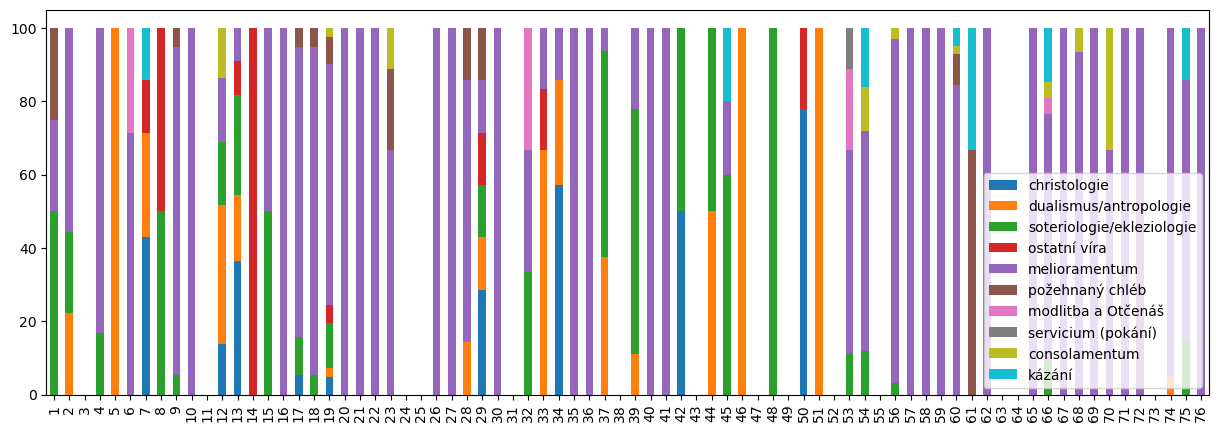

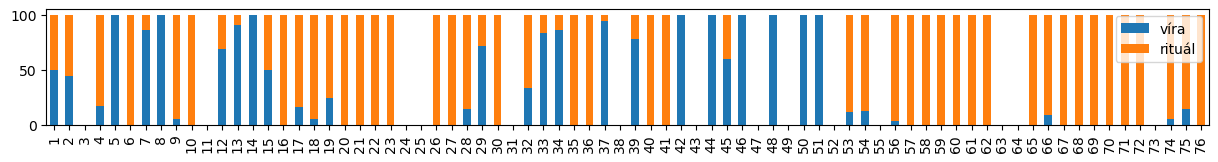

In [591]:
depos_max = 76
hitsy = []
mean = 0

for c in range(0, 12):
    hitsy.append([])
    for i in range(1, depos_max + 1):
        hitsy[c].append(0)
        
for c in range(0, 10):
    for i in range(1, depos_max + 1):
        if (total_hits[0][i-1]+total_hits[1][i-1] != 0):            
            hitsy[c][i-1] = hits[c][i-1]/((total_hits[0][i-1]+total_hits[1][i-1])*0.01)
            if (c < 4):
                hitsy[10][i-1] += hitsy[c][i-1]
            else:
                hitsy[11][i-1] += hitsy[c][i-1]

for i in range(1, depos_max + 1):
    mean += hitsy[10][i-1]
    
print (mean)
print (mean/62)
                
df = pd.DataFrame({'christologie': hitsy[0],
                  'dualismus/antropologie': hitsy[1],
                  'soteriologie/ekleziologie': hitsy[2],
                  'ostatní víra': hitsy[3],
                  'melioramentum': hitsy[4],
                  'požehnaný chléb': hitsy[5],
                  'modlitba a Otčenáš': hitsy[6],
                  'servicium (pokání)': hitsy[7],
                  'consolamentum': hitsy[8],
                  'kázání': hitsy[9],
                  }, index = index)
df.plot.bar(stacked=True, figsize=(15, 5))

df2 = pd.DataFrame({'víra': hitsy[10],
                    'rituál': hitsy[11],
                  }, index = index)
df2.plot.bar(stacked=True, figsize=(15, 1.5))

<AxesSubplot:>

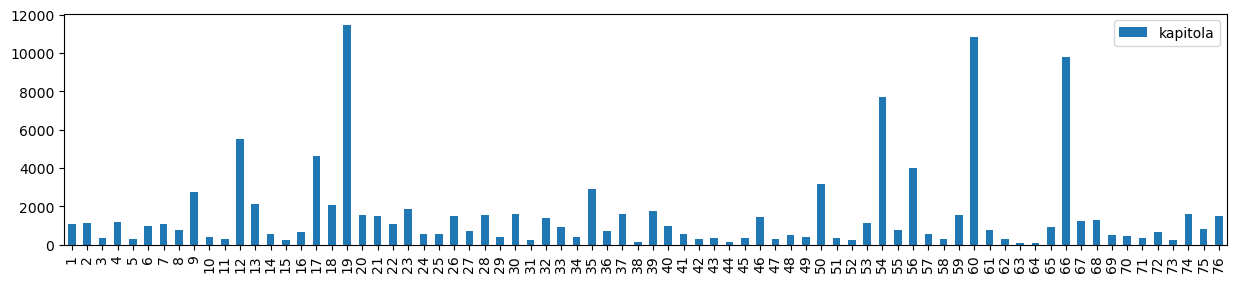

In [577]:
import os.path as pth
import pandas as pd

index = []
counts = []

pers_max = 76
depos_max = 12

for pers in range(1, pers_max + 1):
    index.append(pers)
    name = dir + "/depos-word/" + str("{:02d}".format(pers)) + ".txt"
    if (pth.isfile(name)):
        file = open(name, "rt")
        data = file.read()
        words = data.split()
        counts.append(len(words))
                       
df = pd.DataFrame({'kapitola': counts,
                  }, index = index)
df.plot.bar(stacked=False, figsize=(15, 3))

<AxesSubplot:>

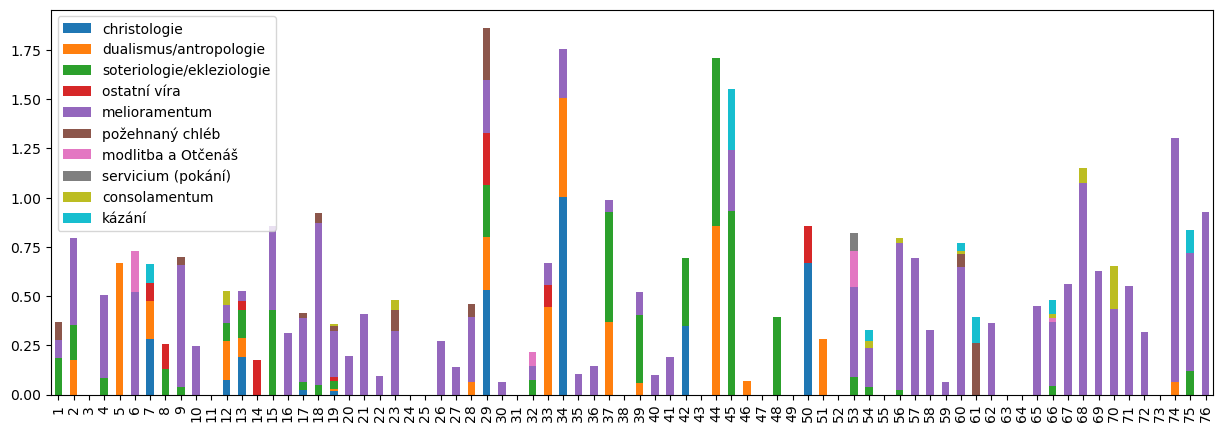

In [575]:
depos_max = 76

hitsx = []
for c in range(0, 11):
    hitsx.append([])
    for i in range(1, depos_max + 1):
        hitsx[c].append(0)
    
for i in range(1, depos_max + 1):
    hits[10][i-1] = counts[i-1] - total_hits[0][i-1] - total_hits[1][i-1]

for c in range(0, 11):
    for i in range(1, depos_max  + 1):
        #print (hits[c][i-1], counts[i-1] * 0.01, hits[c][i-1]/(counts[i-1] * 0.01))
        hitsx[c][i-1] = hits[c][i-1]/(counts[i-1] * 0.01)

        
df = pd.DataFrame({'christologie': hitsx[0],
                  'dualismus/antropologie': hitsx[1],
                  'soteriologie/ekleziologie': hitsx[2],
                  'ostatní víra': hitsx[3],
                  'melioramentum': hitsx[4],
                  'požehnaný chléb': hitsx[5],
                  'modlitba a Otčenáš': hitsx[6],
                  'servicium (pokání)': hitsx[7],
                  'consolamentum': hitsx[8],
                  'kázání': hitsx[9],
                  }, index = index)
df.plot.bar(stacked=True, figsize=(15, 5))